# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will do some basic data analysis in python 

## Clarifications
1. The same score for the project will be given to each member of the team.  
2. When you are asked to provide a verbal solution - write it concisely and short (a couple of sentences).
3. Data description can be found [here](https://archive.ics.uci.edu/ml/datasets/adult)

# 1. Imports

In [2]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 2. Exploratory data analysis

In [3]:
data = pd.read_csv("data/adult.data", header = None)
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols

## 2.1 Row and column count
* How many rows and columns/features we have in the dataset?

In [4]:
#Feeling the data
print (data.shape)
print(str(data.shape[0]) + ' columns and '+ str(data.shape[1]) +' features' )
data.info()
#data.describe()
#data.sample(10)

(32561, 15)
32561 columns and 15 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [6]:
data.head(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#### YOUR VERBAL SOLUTION HERE
32,561 rows <BR>
15 columns (14 features & the target variable 'y') 
#### END YOUR VERBAL SOLUTION HERE


## 2.2 Missing values proportion
* For each feature - what is the percentage of missing values in it?
* Describe one method to fill missing data (data imputation)

If there will be many missing values then we will need to take it in consideration later 

In [7]:
#calculating the percentage of missing values
for col in data.columns:
    print(col+': '+str(sum(data[col].isnull())/len(data)))
    
#filling missing data
data = data.fillna(0)

#? seems to represent a missing value in some categorical feature. 
#Calculating the percentage of missing values in this case:
for col in [c for c in data.columns if data[c].dtype =='object'] :
    x = np.round(100*sum(data[col].str.contains('\?'))/len(data),2)
    print(col+': '+str(x) +' %')

age: 0.0
workclass: 0.0
fnlwgt: 0.0
education: 0.0
education_num: 0.0
marital_status: 0.0
occupation: 0.0
relationship: 0.0
race: 0.0
sex: 0.0
capital_gain: 0.0
capital_loss: 0.0
hours_per_week: 0.0
native_country: 0.0
y: 0.0
workclass: 5.64 %
education: 0.0 %
marital_status: 0.0 %
occupation: 5.66 %
relationship: 0.0 %
race: 0.0 %
sex: 0.0 %
native_country: 1.79 %
y: 0.0 %


#### YOUR VERBAL SOLUTION HERE
Only 3 features in the dataset are having "?" values which we can treat as missing values.<BR>
The proportions are:<br/>
workclass 5.6% of missing values<br/>
occupation 5.6% of missing values<br/>
native_country 1.8% of missing values<br/>
All other columns does not contains missing values.

In case we have missing values (by definition, e.g. nan, Nan, Null, etc.) in the dataset, we can use for examples the method "data.fillna()" or "data.interpolate()" to fill them
for numerical features, or filling for example the value per it's proportion (by frequently) for categorical features.
#### END YOUR VERBAL SOLUTION HERE

## 2.3 Categorical features

* Which of the features are categorical type? for each feature like that, how many unique values it has?

In [8]:
### YOUR CODE HERE
print (data.dtypes)
categorical_features = [c for c in data.columns if data[c].dtype =='object'] 
# ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
print(categorical_features)

#Printing each categorical feature, and the # of occurrences of it, for the features contains '?', 
# In the answer, I've subtracted 1.  
for col in categorical_features:
    print (col + ": " + str(data[col].nunique()))

### END YOUR CODE

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
y                 object
dtype: object
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'y']
workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42
y: 2


#### YOUR VERBAL SOLUTION HERE
The categorical features and their number of unique values are:<br/>
workclass: 8 <br/>
education: 16 <br/>
marital_status: 7 <br/>
occupation: 14 <br/>
relationship: 6 <br/>
race: 5 <br/>
sex: 2 <br/>
native_country: 41 <br/>
#### END YOUR VERBAL SOLUTION HERE


## 2.4 Feature distribution

* Plot the distribution of each feature
* Is our data set balanced (do we have the same amount of <=50K and >50K in the label?)

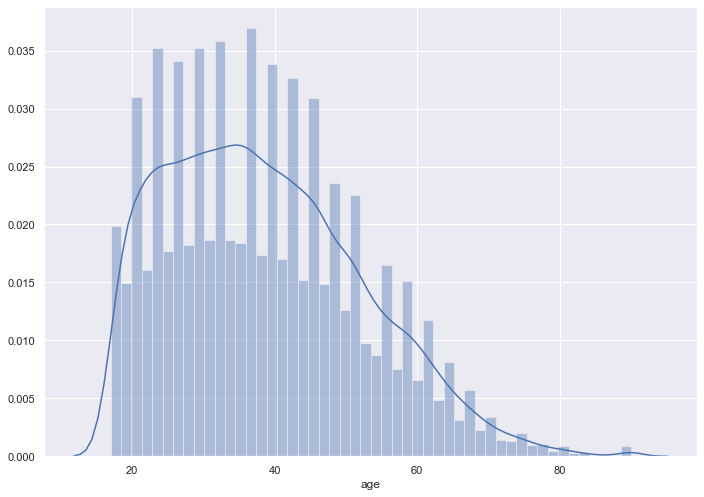

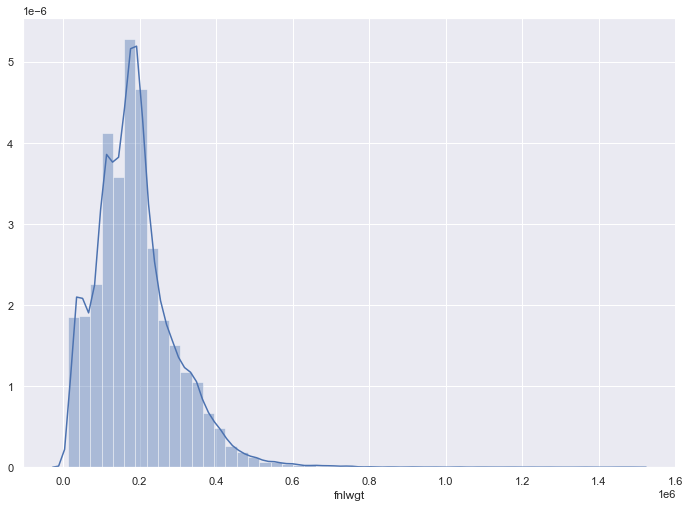

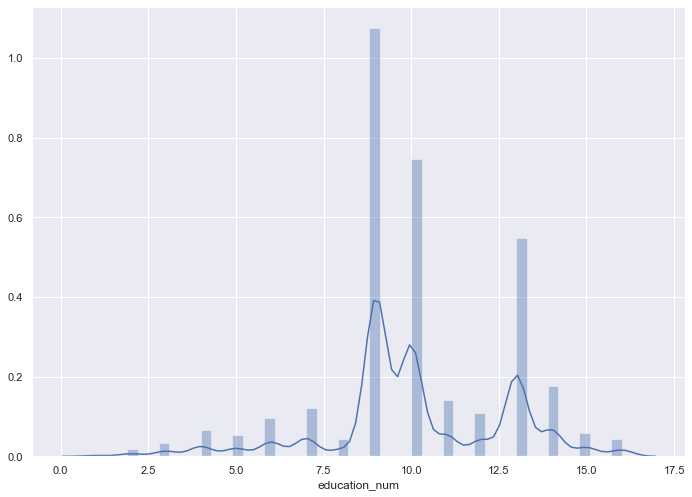

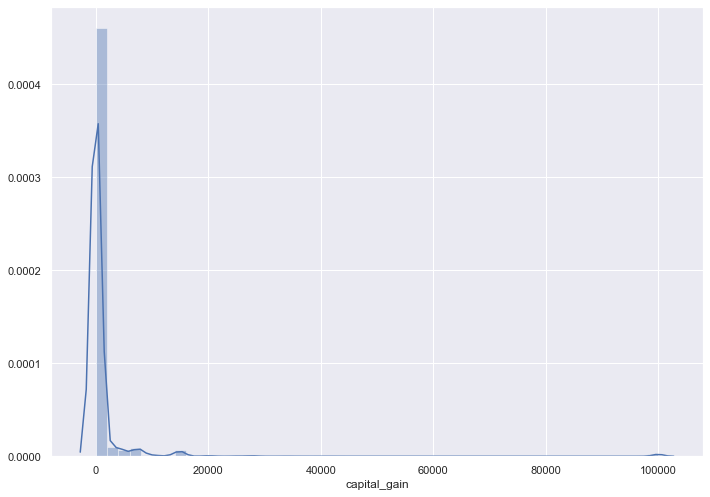

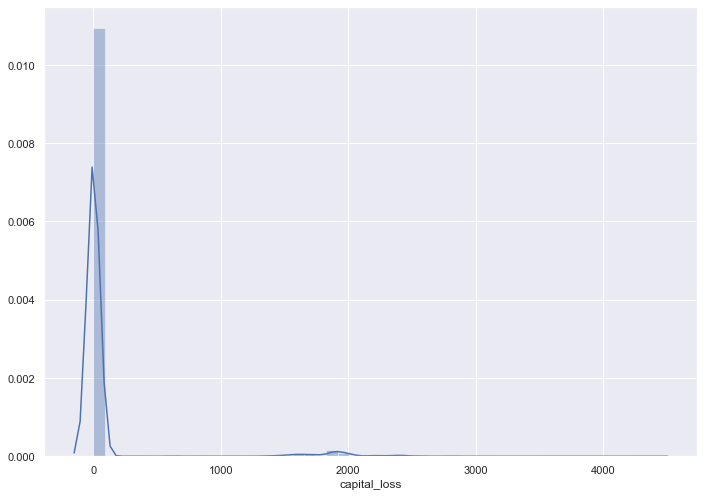

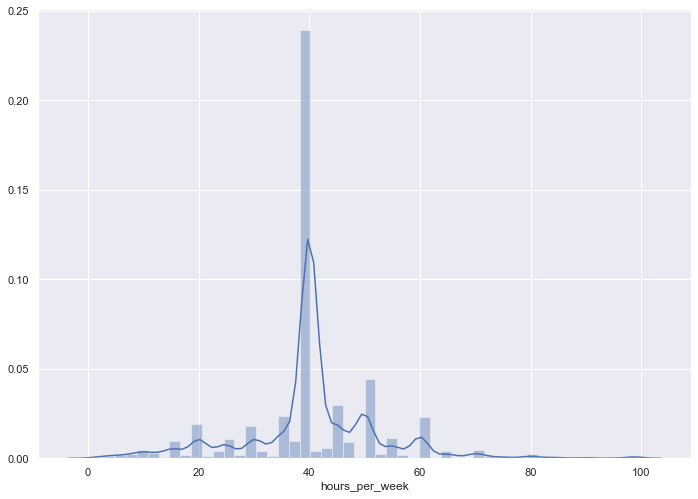

In [9]:
### YOUR CODE HERE
#Part 1
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#Plotting the distribution of each numerical feature
for val in numerical_features:
    sns.set(rc={'figure.figsize': (11.7, 8.27)})
    sns.distplot(data[val])
    plt.show()

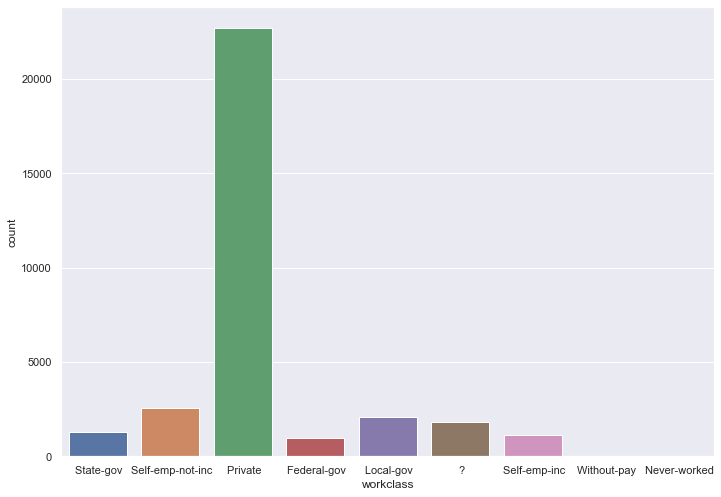

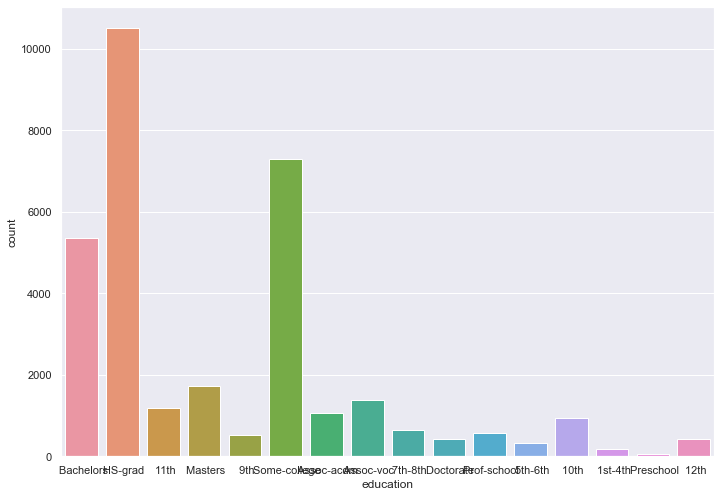

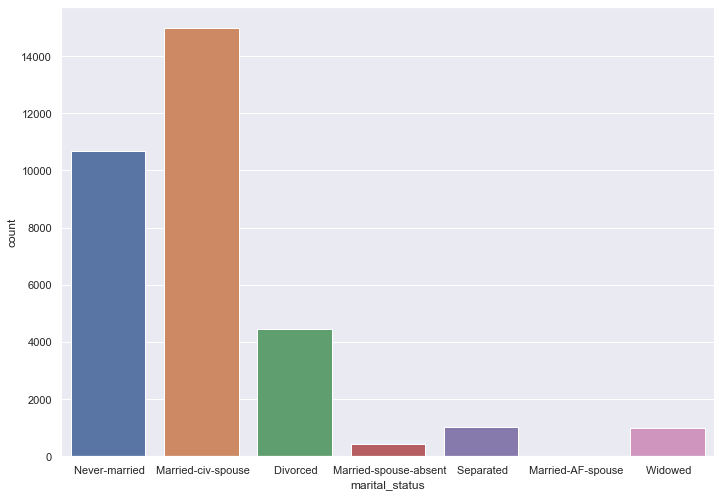

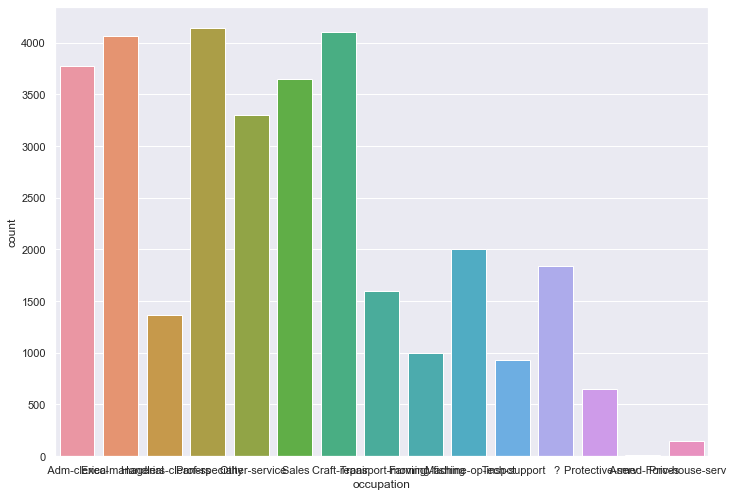

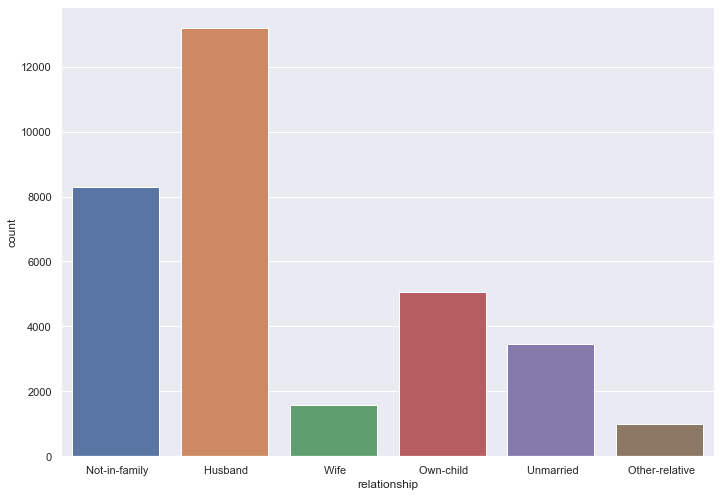

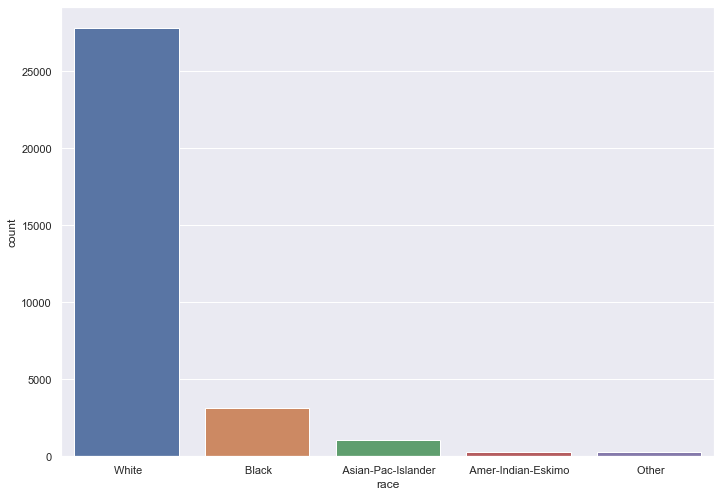

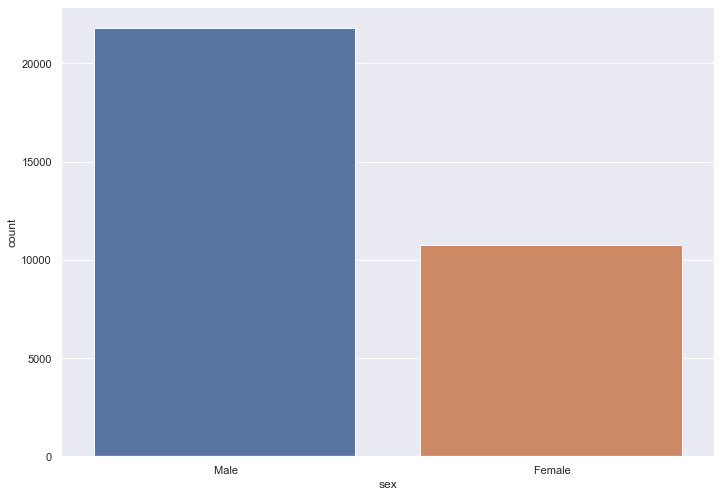

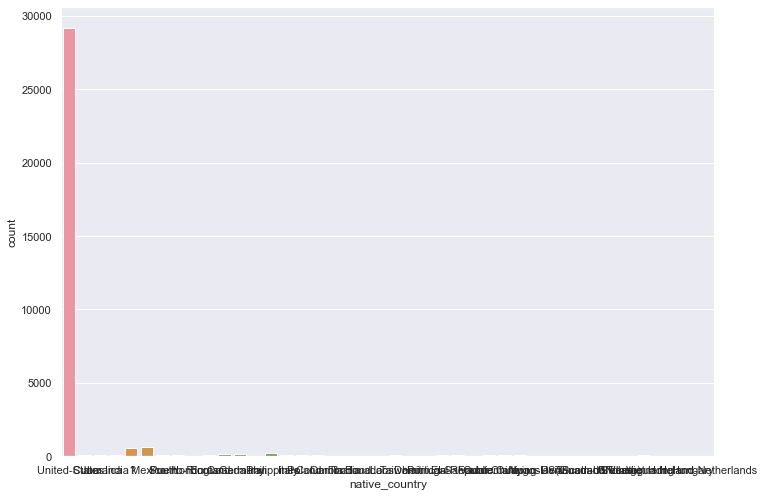

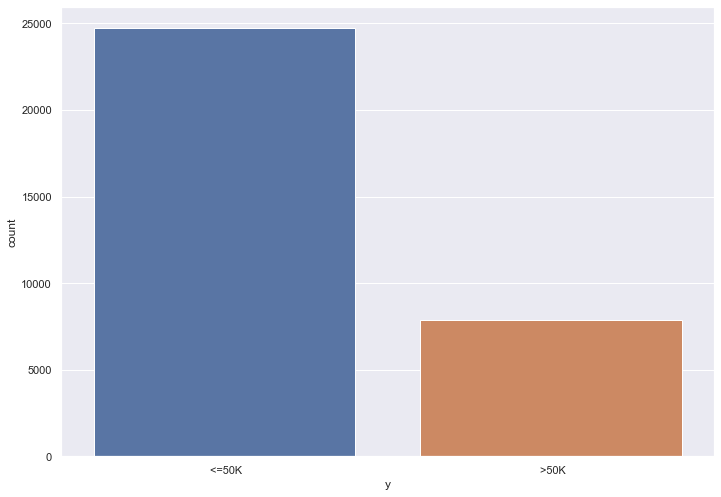

In [10]:
#Plotting the distribution of each categorical feature
for val in categorical_features:
    sns.set(rc={'figure.figsize': (11.7, 8.27)})
    fig, ax = plt.subplots()
    sns.countplot(x=val,data=data)
    plt.show()

 <=50K    24720
 >50K      7841
Name: y, dtype: int64

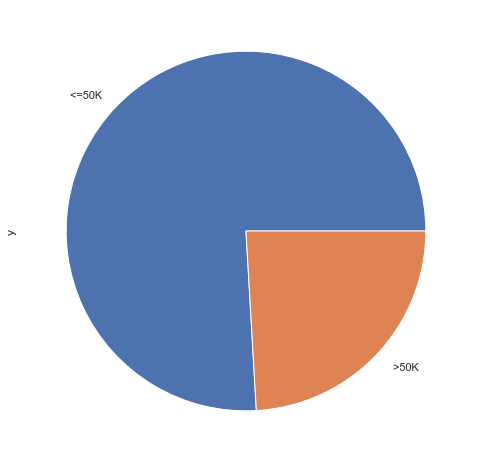

In [11]:
#Part 2
data['y'].value_counts().plot(kind='pie')
data['y'].value_counts()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE
The data set is not balanced! </br> 
As there are around 75% rows which the 'y' <=50K, and 25% rows which the 'y' >50K.
#### END YOUR VERBAL SOLUTION HERE

## 2.5 Correlation plot

* Plot a correlation plot between the numeric features

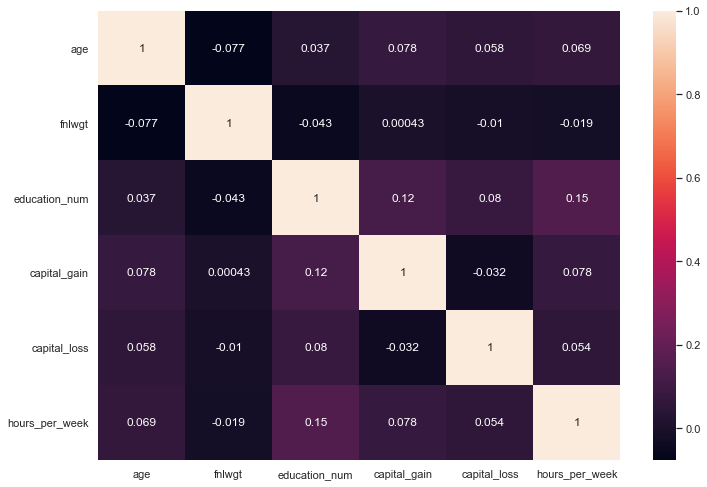

In [12]:
### YOUR CODE HERE

corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### END YOUR CODE

## 2.6 Important features

* Try to understand which features will be important for the prediction and back it up with a plot or two that shows it.

It is an open question and there are many ways to approach it. 

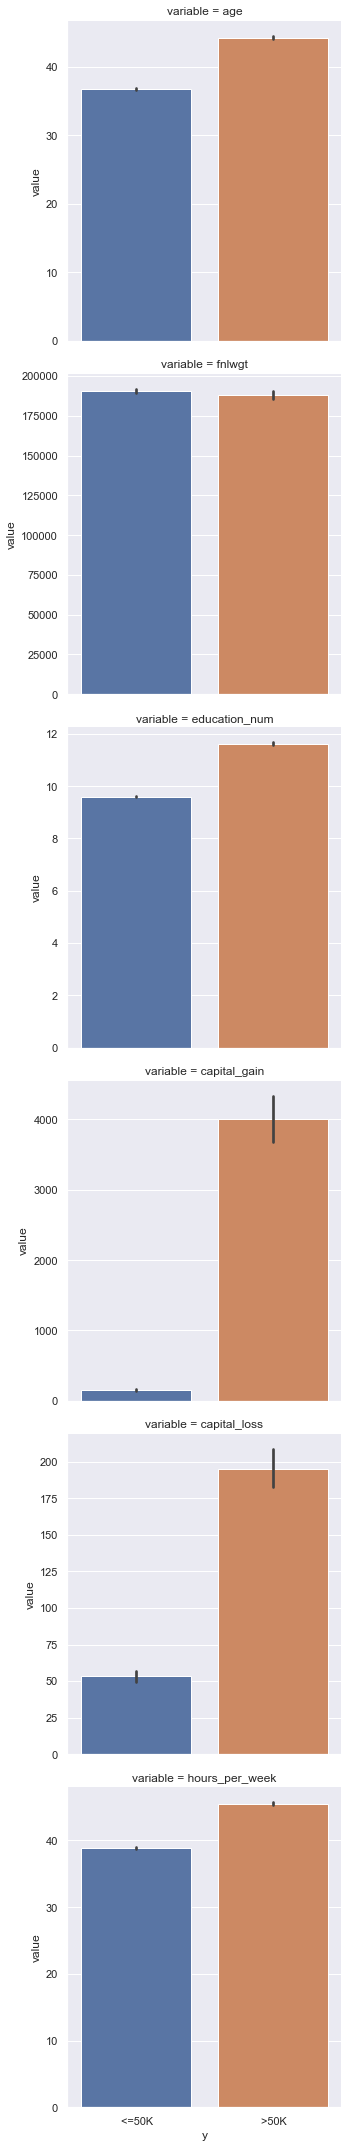

In [13]:
import warnings
warnings.filterwarnings('ignore')
#numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
d = pd.melt(data, id_vars=['y'], value_vars=numerical_features)
sns.factorplot(x="y", y='value', data=d,row='variable', sharey=False, kind='bar')

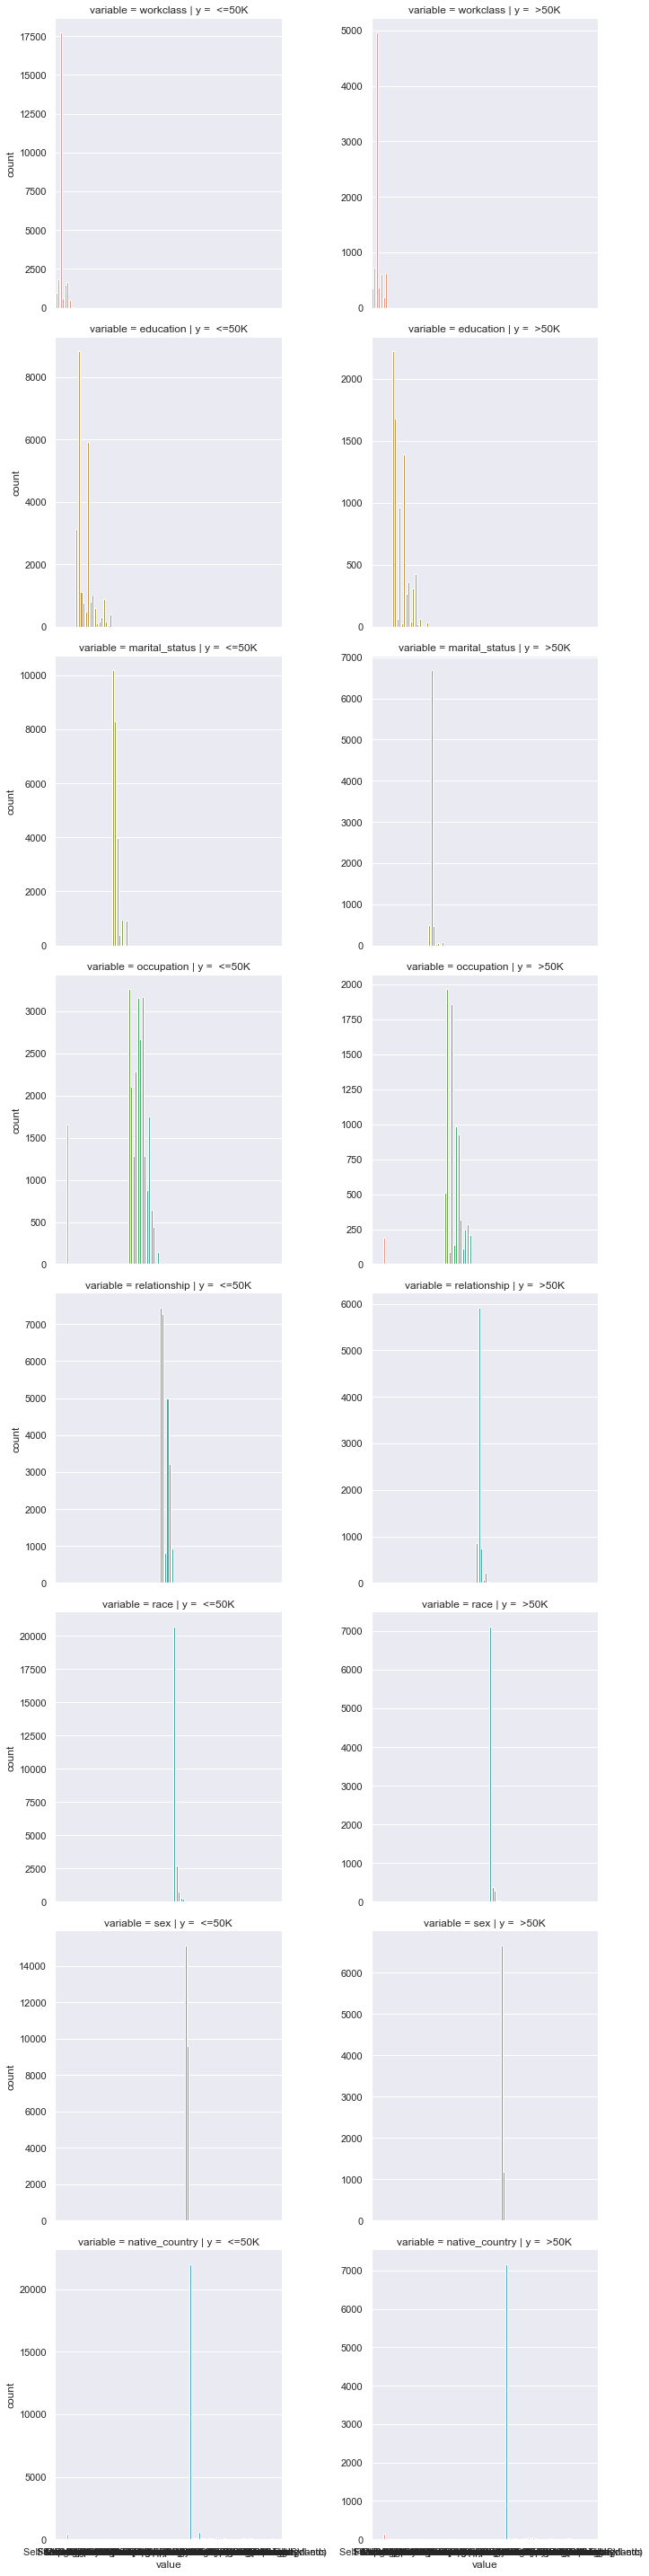

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#First we remove the target variable from the list
categorical_features = [c for c in data.columns if data[c].dtype =='object' and c!='y'] 
d = pd.melt(data, id_vars=['y'], value_vars=categorical_features)
sns.factorplot(col="y", x='value', data=d,row='variable',sharey=False,kind='count')

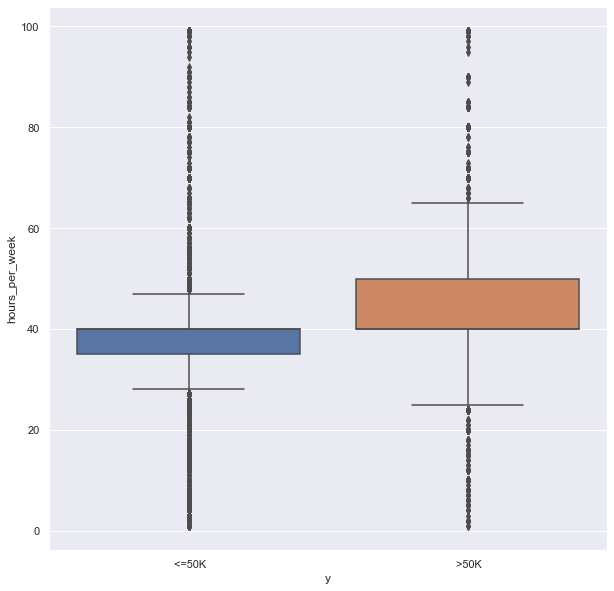

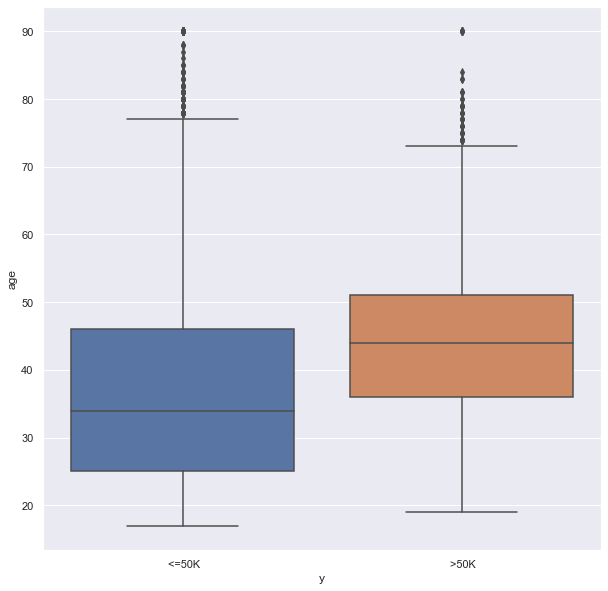

In [15]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="y", y="hours_per_week", data=data)
plt.show()
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="y", y="age", data=data)
plt.show()

#### YOUR VERBAL SOLUTION HERE
I assume that in this question you didn't mean us to run complex methods to calculate Important Features, so, I kept it simple ;) <br/> 
The features which might be important for the predication are:<br/>

capital_loss <br/>
capital_gain <br/>
hours_per_week </br>
age
#### END YOUR VERBAL SOLUTION HERE